In [1]:
import pandas as pd
import numpy as np

In [2]:
df_main = pd.read_csv('Textual_description.csv')

## Cleaning

In [3]:
df_main.head(3)

,textual description,code_rome,categorie,sub_categorie,sub_sub_categorie,name
0,"La CUMA des ARNAUDS, groupe d'agriculteurs à t...",A1101,A,11,1,Conduite d'engins agricoles et forestiers
1,"Rattaché(e) au chef de culture, vous aurez pou...",A1101,A,11,1,Conduite d'engins agricoles et forestiers
2,"Votre agence Partnaire Saint Avold, avec son é...",A1101,A,11,1,Conduite d'engins agricoles et forestiers


In [4]:
df_main.iloc[0]["textual description"]

"La CUMA des ARNAUDS, groupe d'agriculteurs à taille humaine avec un parcellaire rassemblé autour de Réaux sur Trèfle, cherche un(e) chauffeur(se) pour sa moissonneuse CASE axiale (barre de coupe 5m) sur la saison de moisson 2022. \nPostulez avant le 20 avril 2022.\nMissions :\t\n-\tConduite autonome de Moissonneuse batteuse\n-\tPréparation du matériel le matin : soufflage, dépoussiérage, graissage.\n\nDate :\tDébut entre le 15/6 et le 30/6 selon la maturité"

In [5]:
test = df_main.iloc[0]["textual description"]

def f(string):
    string = string.replace('\n', ' ').replace('\t', ' ').replace('  ', '')
    return string
            

In [6]:
f(test)

"La CUMA des ARNAUDS, groupe d'agriculteurs à taille humaine avec un parcellaire rassemblé autour de Réaux sur Trèfle, cherche un(e) chauffeur(se) pour sa moissonneuse CASE axiale (barre de coupe 5m) sur la saison de moisson 2022.Postulez avant le 20 avril 2022. Missions :- Conduite autonome de Moissonneuse batteuse - Préparation du matériel le matin : soufflage, dépoussiérage, graissage.Date : Début entre le 15/6 et le 30/6 selon la maturité"

In [7]:
(lambda x: x.replace('\n', ' ').replace('\t', ' ').replace('  ', ''))(test)

"La CUMA des ARNAUDS, groupe d'agriculteurs à taille humaine avec un parcellaire rassemblé autour de Réaux sur Trèfle, cherche un(e) chauffeur(se) pour sa moissonneuse CASE axiale (barre de coupe 5m) sur la saison de moisson 2022.Postulez avant le 20 avril 2022. Missions :- Conduite autonome de Moissonneuse batteuse - Préparation du matériel le matin : soufflage, dépoussiérage, graissage.Date : Début entre le 15/6 et le 30/6 selon la maturité"

In [8]:
df_main['textual description']  = df_main['textual description'].apply(lambda x: x.replace('\n', ' ').replace('\t', ' ').replace('  ', ''))

In [9]:
idx = np.random.randint(len(df_main))
print(df_main.iloc[idx]["name"])
df_main.iloc[idx]["textual description"]

Horticulture et maraîchage


"Envie de travailler en plein air Nous recherchons pour l'un de nos clients un agent pépiniériste H/F.\xa0 \xa0 * Assurer les travaux de productions de plantes (rempotage, plaçage, taille, désherbage, suivi des irrigations, protection des cultures etc) * Préparer les plantes en vue de la commercialisation ( choix sur les aires de cultures jusqu'à l'expédition chez les clients)\xa0 * Assurer le respect des consignes \xa0 Ce poste est à pourvoir en CDI dès que possible, en horaire de journée. \xa0 Selon la grille conventionnelle de l'entreprise et votre expérience, la rémunération peut varier.Vous avez une expérience confirmée dans le domaine de l'horticulture et/ou une expérience sur un poste similaire Vous savez faire preuve d'autonomie et vous avez le sens de l'observation.\xa0 Vous êtes apprécié.es pour votre rigueur et votre implication au travail. \xa0 Vous aimez le travail d'équipe Vous êtes alors prêt.e à rejoindre notre Atrihomsphère\xa0! C'est le moment de faire valoir vos Rich

## Visualize

**Length of textual description overall and by categories**

longueur moyenne :  1341.5061178224278


<AxesSubplot:>

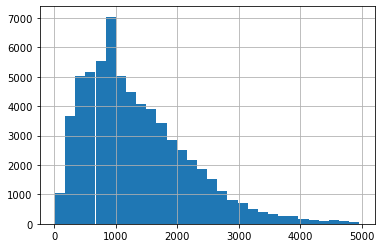

In [18]:
df_main['text_length'] = df_main["textual description"].apply(len)


print("Mean length : ", df_main['text_length'].mean())
df_main["text_length"].hist(bins = 30)

Mean length :  1341.5061178224278


array([[<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'D'}>],
       [<AxesSubplot:title={'center':'E'}>,
        <AxesSubplot:title={'center':'F'}>,
        <AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'H'}>],
       [<AxesSubplot:title={'center':'I'}>,
        <AxesSubplot:title={'center':'J'}>,
        <AxesSubplot:title={'center':'K'}>,
        <AxesSubplot:title={'center':'L'}>],
       [<AxesSubplot:title={'center':'M'}>,
        <AxesSubplot:title={'center':'N'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

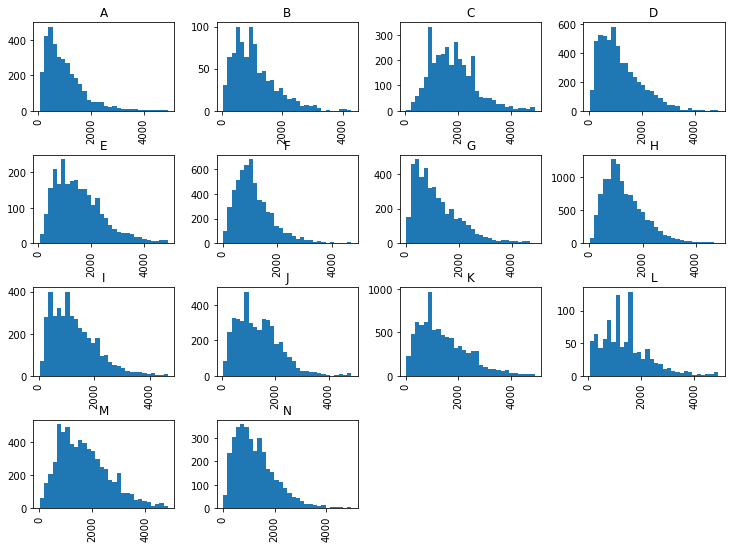

In [27]:
print("Mean length : ", df_main['text_length'].mean())
df_main["text_length"].hist(bins = 30, by = df_main["categorie"], figsize = (12,9))

**Repartion between the different categories**

categorie
A     3367
B      891
C     3143
D     5399
E     2526
F     5606
G     4308
H    11387
I     4062
J     4416
K     8412
L      967
M     6259
N     3659
Name: textual description, dtype: int64


<AxesSubplot:>

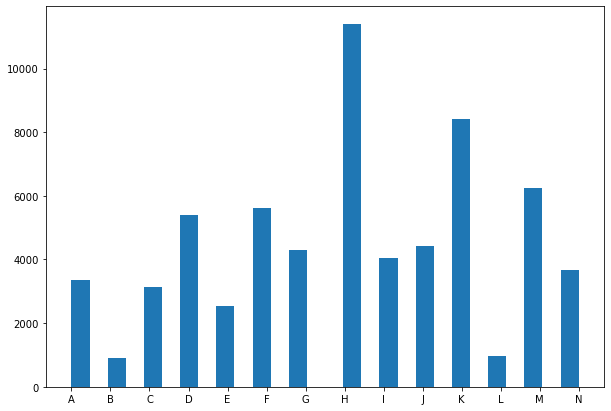

In [40]:
print(df_main.groupby("categorie").count()["textual description"])
df_main["categorie"].hist(bins = 28, grid = False, figsize = (10,7))


## Splitting the dataset

In [41]:
from sklearn.model_selection import train_test_split


In [44]:
df_train, df_test= train_test_split(df_main, test_size=0.2, random_state=1, shuffle = True)

df_train, df_val= train_test_split(df_train, test_size=0.25, random_state=1, shuffle = True) #0.25*0.8 = 0.2

In [45]:
df_train.to_csv('train_dataset.csv',index=False)
df_val.to_csv('val_dataset.csv',index=False)
df_test.to_csv('test_dataset.csv',index=False)